In [13]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from LIN_REG.linreg import linear_regression_multi_graph, lin_prediction_error, linearRegression, ridgeRegression, lassoRegression, polynomialRegression,linear_regression_multi_graph_comb
from LIN_REG.data_loader import data_loader_pathloss, describeData
from MLP.mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, mlp_train_graph, errorDist, mlp_train_multi_graph, mlp_train_multi_graph_comb
from MLP.utils import data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
%autoreload
X_train_bh_34, y_train_bh_34, X_val_bh_34, y_val_bh_34, X_test_bh_34, y_test_bh_34 = data_loader_pathloss_with_freq('data/PLdata_bh_34.mat',np.log10(3400))
X_train_bh_53, y_train_bh_53, X_val_bh_53, y_val_bh_53, X_test_bh_53, y_test_bh_53 = data_loader_pathloss_with_freq('data/PLdata_bh_53.mat',np.log10(5300))
X_train_bh_64, y_train_bh_64, X_val_bh_64, y_val_bh_64, X_test_bh_64, y_test_bh_64 = data_loader_pathloss_with_freq('data/PLdata_bh_64.mat',np.log10(6400))

X_train_bh = np.concatenate((X_train_bh_34, X_train_bh_53), axis=0)
y_train_bh = np.concatenate((y_train_bh_34, y_train_bh_53),axis=0)
X_train_bh = np.concatenate((X_train_bh, X_train_bh_64), axis=0)
y_train_bh = np.concatenate((y_train_bh, y_train_bh_64),axis=0)

df_train_bh = pd.DataFrame({'X_train1':X_train_bh[:,0],'X_train2':X_train_bh[:,1], 'y_train':y_train_bh}).sort_values(by=['X_train1'])
X_train_bh = np.concatenate((np.array(df_train_bh['X_train1']).reshape(-1,1),np.array(df_train_bh['X_train2']).reshape(-1,1)),axis=1)
y_train_bh = np.array(df_train_bh['y_train'])

X_val_bh = np.concatenate((X_val_bh_34, X_val_bh_53), axis=0)
y_val_bh = np.concatenate((y_val_bh_34, y_val_bh_53),axis=0)
X_val_bh = np.concatenate((X_val_bh, X_val_bh_64), axis=0)
y_val_bh = np.concatenate((y_val_bh, y_val_bh_64),axis=0)
df_val_bh = pd.DataFrame({'X_val1':X_val_bh[:,0],'X_val2':X_val_bh[:,1], 'y_val':y_val_bh}).sort_values(by=['X_val1'])
X_val_bh = np.concatenate((np.array(df_val_bh['X_val1']).reshape(-1,1),np.array(df_val_bh['X_val2']).reshape(-1,1)),axis=1)
y_val_bh = np.array(df_val_bh['y_val'])

X_test_bh = np.concatenate((X_test_bh_34, X_test_bh_53), axis=0)
y_test_bh = np.concatenate((y_test_bh_34, y_test_bh_53),axis=0)
X_test_bh = np.concatenate((X_test_bh, X_test_bh_64), axis=0)
y_test_bh = np.concatenate((y_test_bh, y_test_bh_64),axis=0)
df_test_bh = pd.DataFrame({'X_test1':X_test_bh[:,0],'X_test2':X_test_bh[:,1], 'y_test':y_test_bh}).sort_values(by=['X_test1'])
X_test_bh = np.concatenate((np.array(df_test_bh['X_test1']).reshape(-1,1),np.array(df_test_bh['X_test2']).reshape(-1,1)),axis=1)
y_test_bh = np.array(df_test_bh['y_test'])

X_train_ma_34, y_train_ma_34, X_val_ma_34, y_val_ma_34, X_test_ma_34, y_test_ma_34 = data_loader_pathloss_with_freq('data/PLdata_ma_34.mat',np.log10(3400))
X_train_ma_53, y_train_ma_53, X_val_ma_53, y_val_ma_53, X_test_ma_53, y_test_ma_53 = data_loader_pathloss_with_freq('data/PLdata_ma_53.mat',np.log10(5300))
X_train_ma_64, y_train_ma_64, X_val_ma_64, y_val_ma_64, X_test_ma_64, y_test_ma_64 = data_loader_pathloss_with_freq('data/PLdata_ma_64.mat',np.log10(6400))

X_train_ma = np.concatenate((X_train_ma_34, X_train_ma_53), axis=0)
y_train_ma = np.concatenate((y_train_ma_34, y_train_ma_53),axis=0)
X_train_ma = np.concatenate((X_train_ma, X_train_ma_64), axis=0)
y_train_ma = np.concatenate((y_train_ma, y_train_ma_64),axis=0)
df_train_ma = pd.DataFrame({'X_train1':X_train_ma[:,0],'X_train2':X_train_ma[:,1], 'y_train':y_train_ma}).sort_values(by=['X_train1'])
X_train_ma = np.concatenate((np.array(df_train_ma['X_train1']).reshape(-1,1),np.array(df_train_ma['X_train2']).reshape(-1,1)),axis=1)
y_train_ma = np.array(df_train_ma['y_train'])

X_val_ma = np.concatenate((X_val_ma_34, X_val_ma_53), axis=0)
y_val_ma = np.concatenate((y_val_ma_34, y_val_ma_53),axis=0)
X_val_ma = np.concatenate((X_val_ma, X_val_ma_64), axis=0)
y_val_ma = np.concatenate((y_val_ma, y_val_ma_64),axis=0)
df_val_ma = pd.DataFrame({'X_val1':X_val_ma[:,0],'X_val2':X_val_ma[:,1], 'y_val':y_val_ma}).sort_values(by=['X_val1'])
X_val_ma = np.concatenate((np.array(df_val_ma['X_val1']).reshape(-1,1),np.array(df_val_ma['X_val2']).reshape(-1,1)),axis=1)
y_val_ma = np.array(df_val_ma['y_val'])

X_test_ma = np.concatenate((X_test_ma_34, X_test_ma_53), axis=0)
y_test_ma = np.concatenate((y_test_ma_34, y_test_ma_53),axis=0)
X_test_ma = np.concatenate((X_test_ma, X_test_ma_64), axis=0)
y_test_ma = np.concatenate((y_test_ma, y_test_ma_64),axis=0)
df_test_ma = pd.DataFrame({'X_test1':X_test_ma[:,0],'X_test2':X_test_ma[:,1], 'y_test':y_test_ma}).sort_values(by=['X_test1'])
X_test_ma = np.concatenate((np.array(df_test_ma['X_test1']).reshape(-1,1),np.array(df_test_ma['X_test2']).reshape(-1,1)),axis=1)
y_test_ma = np.array(df_test_ma['y_test'])

dataX_bh = list()
dataX_ma = []
dataX_bh.append(X_train_bh_34)
dataX_bh.append(X_train_bh_53)
dataX_bh.append(X_train_bh_64)

dataX_ma.append(X_train_ma_34)
dataX_ma.append(X_train_ma_53)
dataX_ma.append(X_train_ma_64)

Estimated coefficients[w1(log-dist),w2(freq)]: [31.35615323 19.36528988]
Estimated bias: -28.817771389211813
<Bundang>


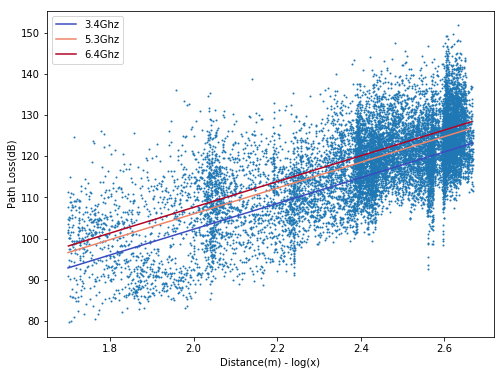

RMSE(dB),train error,test error
3.4Ghz,7.11929,6.67007
5.3Ghz,7.18935,7.21689
6.4Ghz,7.67438,7.33335
Overall,7.32841,7.07991


In [27]:
%autoreload
model = None
model = linearRegression(X_train_bh, y_train_bh,X_val_bh, y_val_bh,X_test_bh, y_test_bh,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Bundang>")
linear_regression_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh)

lin_bh_stat = np.array([lin_prediction_error(model,X_train_bh_34, y_train_bh_34),lin_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 lin_prediction_error(model,X_train_bh_53, y_train_bh_53),lin_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 lin_prediction_error(model,X_train_bh_64, y_train_bh_64),lin_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 lin_prediction_error(model,X_train_bh, y_train_bh), lin_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(lin_bh_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [36.41656424 23.1677845 ]
Estimated bias: -51.58516284580054
<Mokdong>


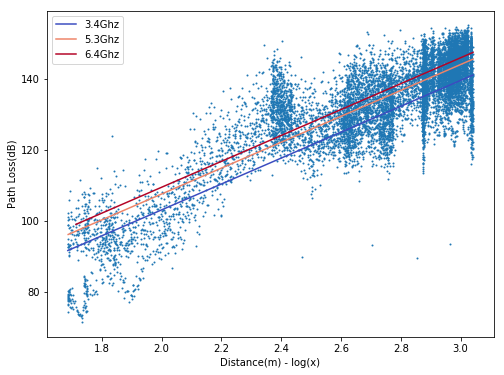

RMSE(dB),train error,test error
3.4Ghz,7.87228,7.74403
5.3Ghz,6.61944,6.62489
6.4Ghz,6.97450,6.38887
Overall,7.15406,6.92375


In [28]:
%autoreload
model = None
model = linearRegression(X_train_ma, y_train_ma, X_val_ma, y_val_ma, X_test_ma, y_test_ma,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Mokdong>")
linear_regression_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma)

lin_ma_stat = np.array([lin_prediction_error(model,X_train_ma_34, y_train_ma_34),lin_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 lin_prediction_error(model,X_train_ma_53, y_train_ma_53),lin_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 lin_prediction_error(model,X_train_ma_64, y_train_ma_64),lin_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 lin_prediction_error(model,X_train_ma, y_train_ma), lin_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(lin_ma_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [31.351848  19.3546755]
Estimated bias: -28.768246400130167
<Bundang>


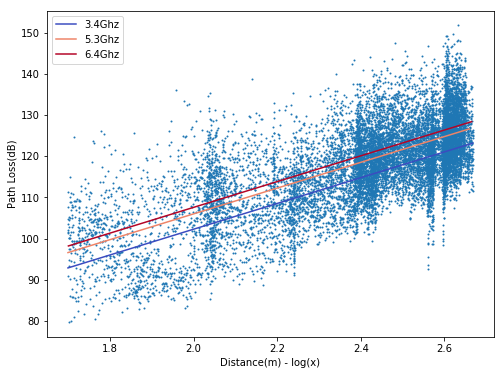

RMSE(dB),train error,test error
3.4Ghz,7.11919,6.67021
5.3Ghz,7.18929,7.21692
6.4Ghz,7.67453,7.33354
Overall,7.32842,7.08003


In [29]:
%autoreload
model = None
model = ridgeRegression(X_train_bh, y_train_bh,X_val_bh, y_val_bh,X_test_bh, y_test_bh,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Bundang>")
linear_regression_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh)

rid_bh_stat = np.array([lin_prediction_error(model,X_train_bh_34, y_train_bh_34),lin_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 lin_prediction_error(model,X_train_bh_53, y_train_bh_53),lin_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 lin_prediction_error(model,X_train_bh_64, y_train_bh_64),lin_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 lin_prediction_error(model,X_train_bh, y_train_bh), lin_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(rid_bh_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [36.38741138 23.00632583]
Estimated bias: -50.910115344035916
<Mokdong>


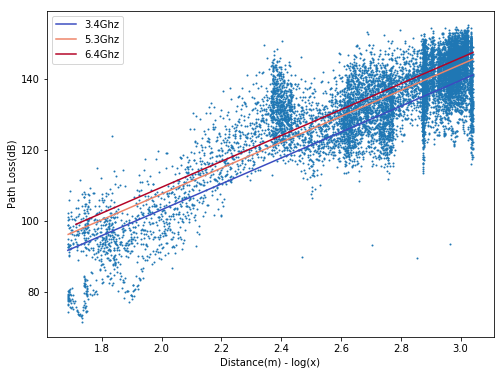

RMSE(dB),train error,test error
3.4Ghz,7.87493,7.74510
5.3Ghz,6.61930,6.62556
6.4Ghz,6.97192,6.38671
Overall,7.15409,6.92368


In [30]:
%autoreload
model = None
model = ridgeRegression(X_train_ma, y_train_ma, X_val_ma, y_val_ma, X_test_ma, y_test_ma,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Mokdong>")
linear_regression_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma)

rid_ma_stat = np.array([lin_prediction_error(model,X_train_ma_34, y_train_ma_34),lin_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 lin_prediction_error(model,X_train_ma_53, y_train_ma_53),lin_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 lin_prediction_error(model,X_train_ma_64, y_train_ma_64),lin_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 lin_prediction_error(model,X_train_ma, y_train_ma), lin_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(rid_ma_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [29.45511135 11.74912743]
Estimated bias: 3.851341723158342
<Bundang>


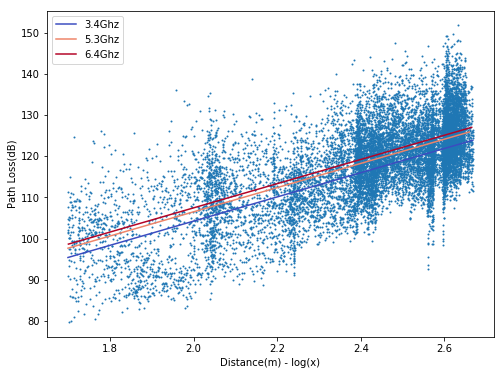

RMSE(dB),train error,test error
3.4Ghz,7.16563,6.86137
5.3Ghz,7.16396,7.22813
6.4Ghz,7.84389,7.52361
Overall,7.39306,7.20822


In [31]:
%autoreload
model = None
model = lassoRegression(X_train_bh, y_train_bh,X_val_bh, y_val_bh,X_test_bh, y_test_bh,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Bundang>")
linear_regression_multi_graph_comb(model, dataX_bh, X_train_bh[:,0], y_train_bh)

las_bh_stat = np.array([lin_prediction_error(model,X_train_bh_34, y_train_bh_34),lin_prediction_error(model,X_test_bh_34, y_test_bh_34),
                 lin_prediction_error(model,X_train_bh_53, y_train_bh_53),lin_prediction_error(model,X_test_bh_53, y_test_bh_53),
                 lin_prediction_error(model,X_train_bh_64, y_train_bh_64),lin_prediction_error(model,X_test_bh_64, y_test_bh_64),
                 lin_prediction_error(model,X_train_bh, y_train_bh), lin_prediction_error(model,X_test_bh, y_test_bh)])

(pd.DataFrame(las_bh_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))

Estimated coefficients[w1(log-dist),w2(freq)]: [35.52468027 15.39843317]
Estimated bias: -20.48893802002783
<Mokdong>


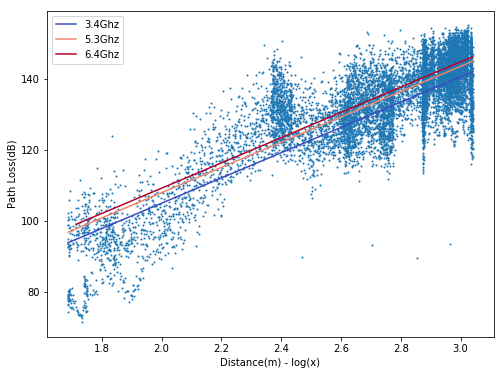

RMSE(dB),train error,test error
3.4Ghz,8.07421,7.87870
5.3Ghz,6.64401,6.68108
6.4Ghz,6.91763,6.33530
Overall,7.21434,6.97381


In [32]:
%autoreload
model = None
model = lassoRegression(X_train_ma, y_train_ma, X_val_ma, y_val_ma, X_test_ma, y_test_ma,'linear regression')
print("Estimated coefficients[w1(log-dist),w2(freq)]: " + str(model.coef_))
print("Estimated bias: " + str(model.intercept_))

print("<Mokdong>")
linear_regression_multi_graph_comb(model, dataX_ma, X_train_ma[:,0], y_train_ma)

las_ma_stat = np.array([lin_prediction_error(model,X_train_ma_34, y_train_ma_34),lin_prediction_error(model,X_test_ma_34, y_test_ma_34),
                 lin_prediction_error(model,X_train_ma_53, y_train_ma_53),lin_prediction_error(model,X_test_ma_53, y_test_ma_53),
                 lin_prediction_error(model,X_train_ma_64, y_train_ma_64),lin_prediction_error(model,X_test_ma_64, y_test_ma_64),
                 lin_prediction_error(model,X_train_ma, y_train_ma), lin_prediction_error(model,X_test_ma, y_test_ma)])

(pd.DataFrame(las_ma_stat.reshape((4,2)),index=pd.Index(['3.4Ghz','5.3Ghz','6.4Ghz', 'Overall']), columns=pd.Index(['train error','test error'],name='RMSE(dB)')))